In [2]:
import numpy as np
from scipy.optimize import fsolve
def h(x):
    return np.exp(x) - 1
def g(x):
    return 5 - x**2


initial_guesses = [-2, 2]
zeros = fsolve(h, initial_guesses)

print("Zeros de h(x):\n", zeros)

Zeros de h(x):
 [-3.24459302e+02 -2.73138515e-09]


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


C:\Users\User\AppData\Local\Temp\ipykernel_12308\1203312523.py:41: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  plt.gcf().canvas.set_window_title('Mathys Gagner - Mateo Esteves')


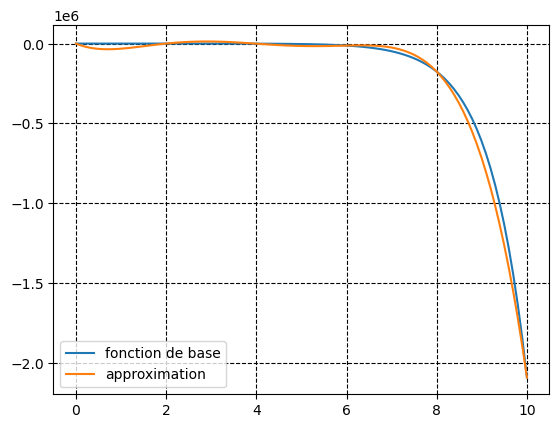

In [3]:
import numpy as np
import numpy.polynomial.polynomial as nppol
import matplotlib.pyplot as plt

def f(x) :
    return h(x)*g(x)

def Q(racines,i) :
    temp=racines.copy()
    x_t=temp.pop(i)
    coef=1/nppol.polyvalfromroots(x_t,temp)
    return (coef*nppol.polyfromroots(temp))

def base_lagrange(px) :
    res_tab = []
    rt = len(px)
    for k in range(rt):
        res_tab.append(Q(px,k))
    return res_tab

def poly_lagrange(px,py) :
    tab_q=base_lagrange(px)
    rt = len(px)
    res=nppol.polyzero
    for h in range(rt):
        res=nppol.polyadd(res,py[h] * tab_q[h])
    return res

##affichage
x=np.linspace(0, 10, 100)
test_poly = poly_lagrange([0, 2, 4, 6, 8, 10], [f(0), f(2), f(4), f(6), f(8), f(10)])
y=f(x)
y1=nppol.polyval(x,test_poly)
legende1,=plt.plot(x,y)
legende2,=plt.plot(x,y1)
##legende
legende1.set_label("fonction de base")
legende2.set_label("approximation")
plt.legend()
plt.grid(color='black',linestyle='--')
plt.gcf().canvas.set_window_title('Mathys Gagner - Mateo Esteves')

##initialisation
plt.show()